In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv(r"C:\Users\USER\PycharmProjects\DSGP-Component 2\data\component2_traffic_dataset.csv")
df.head()


,vehicle_id,depart_time,duration,waiting_time,waiting_count,route_length,time_loss,speed,travel_speed_kmh,hour_of_day,is_peak_hour,efficiency_score,congestion_ratio,vehicle_type,efficiency_score_from_perf,congestion_ratio_from_perf,is_peak_hour_from_perf,hourly_avg_waiting,hourly_avg_speed,hourly_avg_congestion,delay_ratio,productivity_score,efficiency_category
0,3,5.0,69.0,0.0,0,637.42,15.78,9.237971,33.256696,0.0,0,9.237971,0.000000,DEFAULT_VEHTYPE,9.237971,0.000000,0,212.359474,8.070935,0.257138,0.228696,637.420000,medium
1,10,15.0,60.0,10.0,1,414.60,23.78,6.910000,24.876000,0.0,0,6.910000,0.166667,DEFAULT_VEHTYPE,6.910000,0.166667,0,212.359474,8.070935,0.257138,0.396333,37.690909,medium
2,0,0.0,94.0,5.0,2,789.03,25.83,8.393936,30.218170,0.0,0,8.393936,0.053191,DEFAULT_VEHTYPE,8.393936,0.053191,0,212.359474,8.070935,0.257138,0.274787,131.505000,medium
3,32,48.0,62.0,14.0,1,478.15,28.45,7.712097,27.763548,0.0,0,7.712097,0.225806,DEFAULT_VEHTYPE,7.712097,0.225806,0,212.359474,8.070935,0.257138,0.458871,31.876667,medium
4,65,98.0,12.0,0.0,0,84.57,3.51,7.047500,25.371000,0.0,0,7.047500,0.000000,DEFAULT_VEHTYPE,7.047500,0.000000,0,212.359474,8.070935,0.257138,0.292500,84.570000,medium


In [4]:
df.info()
df.describe(include="all")
df.shape
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vehicle_id                  3988 non-null   int64  
 1   depart_time                 3988 non-null   float64
 2   duration                    3988 non-null   float64
 3   waiting_time                3988 non-null   float64
 4   waiting_count               3988 non-null   int64  
 5   route_length                3988 non-null   float64
 6   time_loss                   3988 non-null   float64
 7   speed                       3988 non-null   float64
 8   travel_speed_kmh            3988 non-null   float64
 9   hour_of_day                 3988 non-null   float64
 10  is_peak_hour                3988 non-null   int64  
 11  efficiency_score            3988 non-null   float64
 12  congestion_ratio            3988 non-null   float64
 13  vehicle_type                3988 

vehicle_id                      int64
depart_time                   float64
duration                      float64
waiting_time                  float64
waiting_count                   int64
route_length                  float64
time_loss                     float64
speed                         float64
travel_speed_kmh              float64
hour_of_day                   float64
is_peak_hour                    int64
efficiency_score              float64
congestion_ratio              float64
vehicle_type                   object
efficiency_score_from_perf    float64
congestion_ratio_from_perf    float64
is_peak_hour_from_perf          int64
hourly_avg_waiting            float64
hourly_avg_speed              float64
hourly_avg_congestion         float64
delay_ratio                   float64
productivity_score            float64
efficiency_category            object
dtype: object

<Axes: >

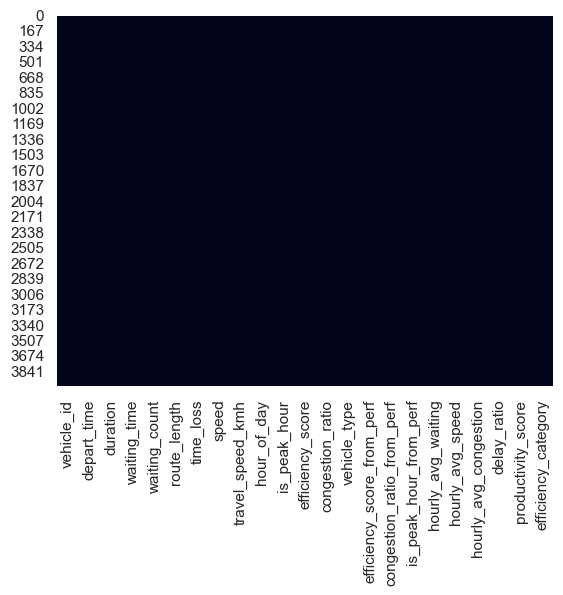

In [5]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)


In [6]:
df.duplicated().sum()


np.int64(0)

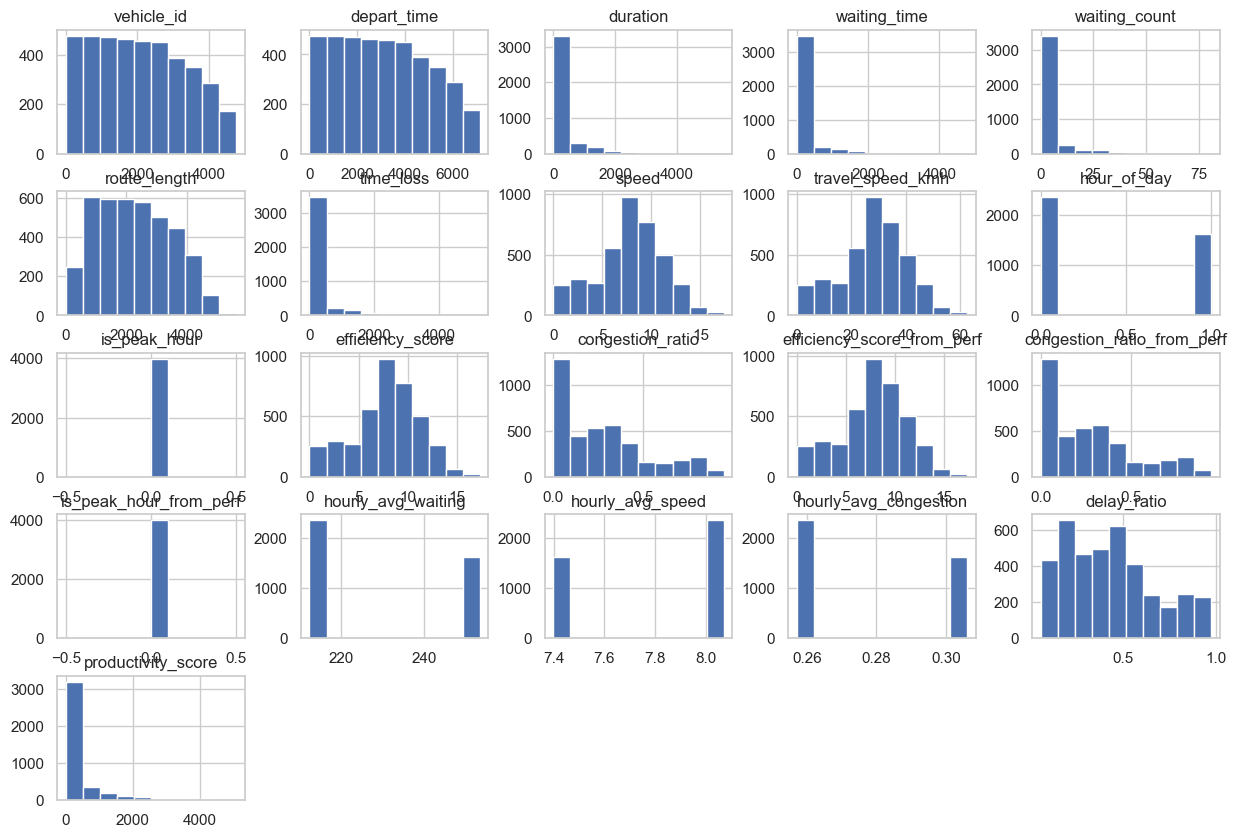

In [7]:
df.hist(figsize=(15,10))
plt.show()


vehicle_type
vehicle_type
DEFAULT_VEHTYPE    3988
Name: count, dtype: int64


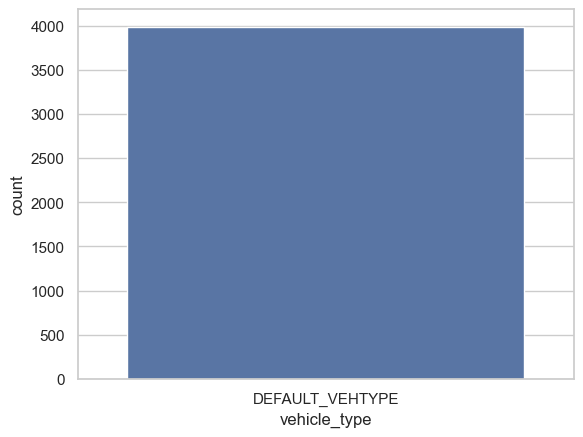

efficiency_category
efficiency_category
medium    2219
high      1002
low        767
Name: count, dtype: int64


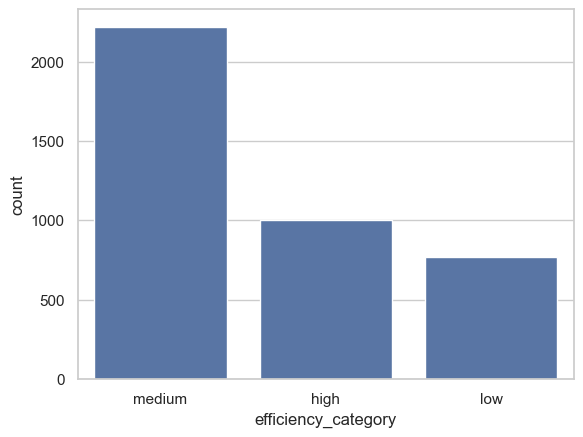

In [8]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(col)
    print(df[col].value_counts())
    sns.countplot(x=df[col])
    plt.show()


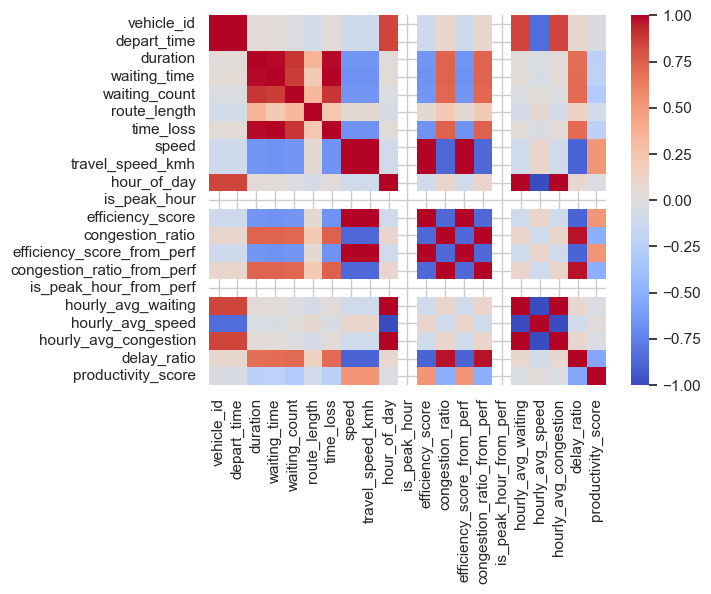

In [10]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.show()



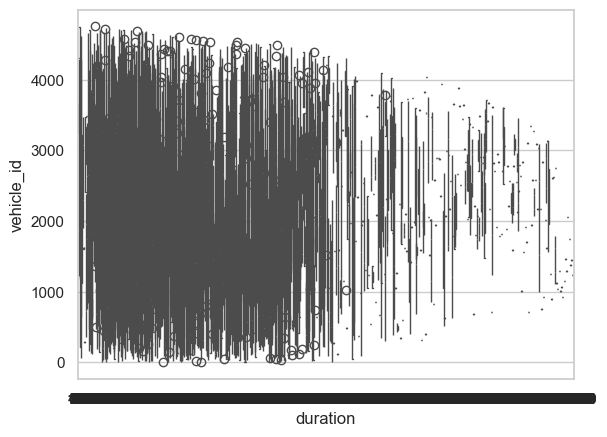

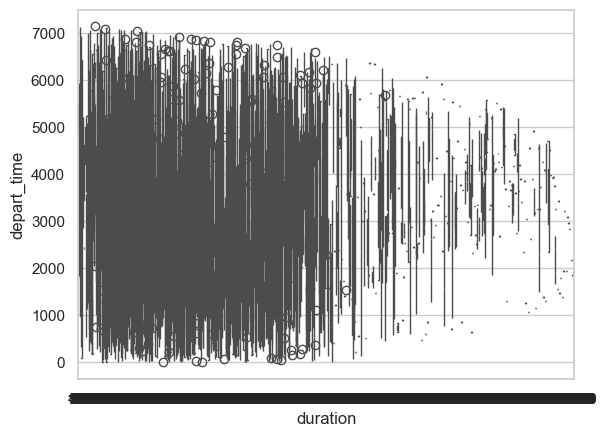

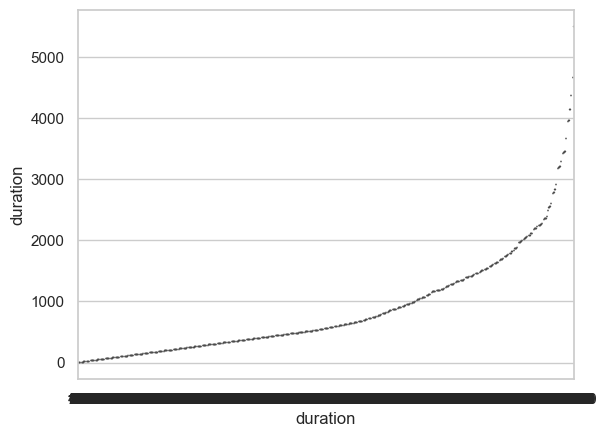

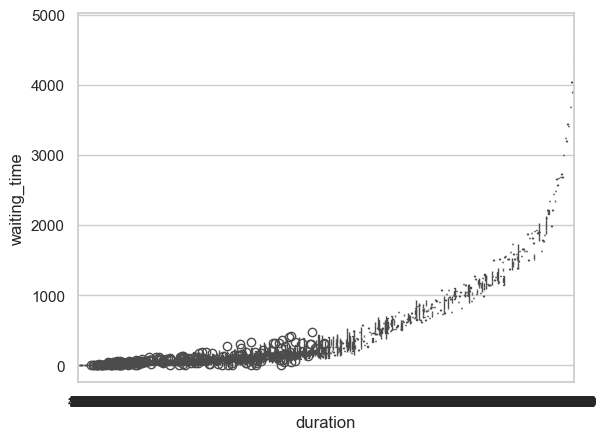

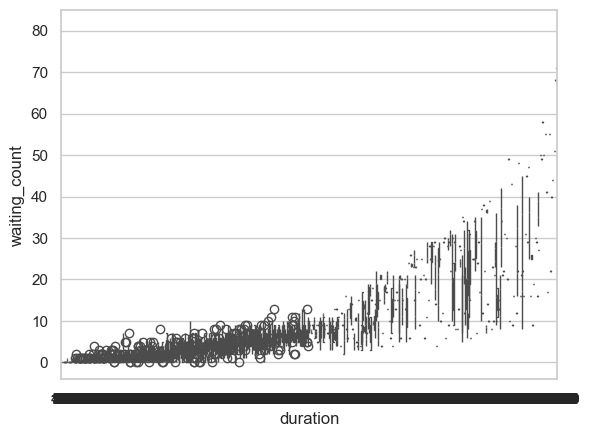

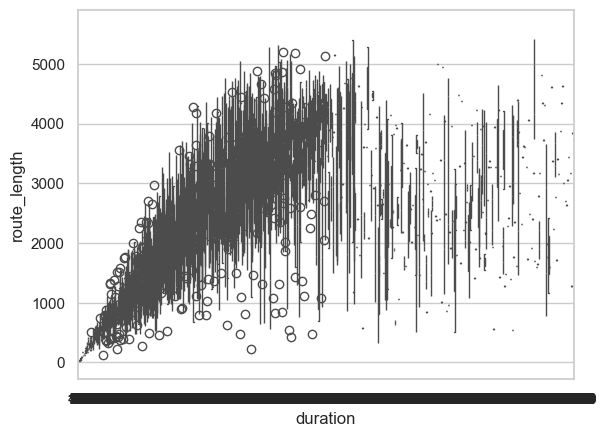

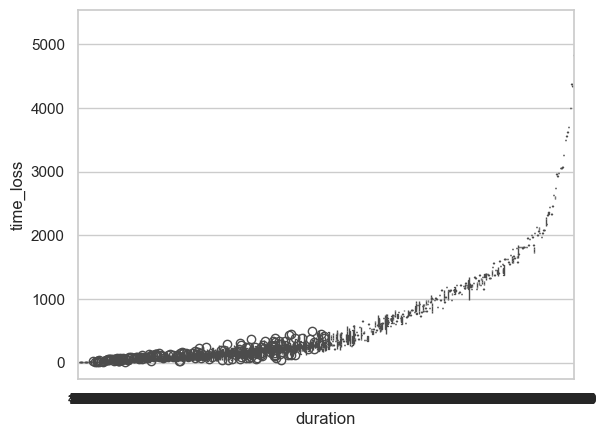

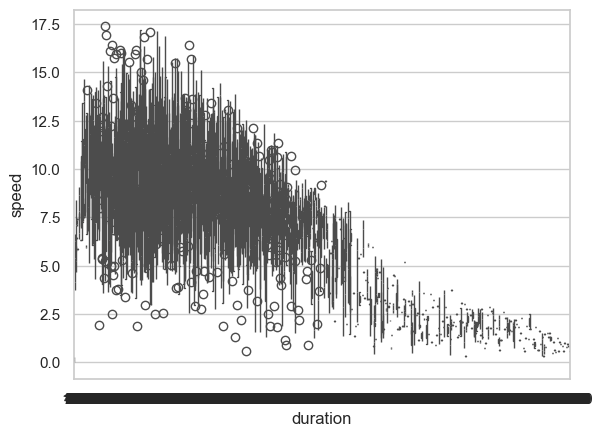

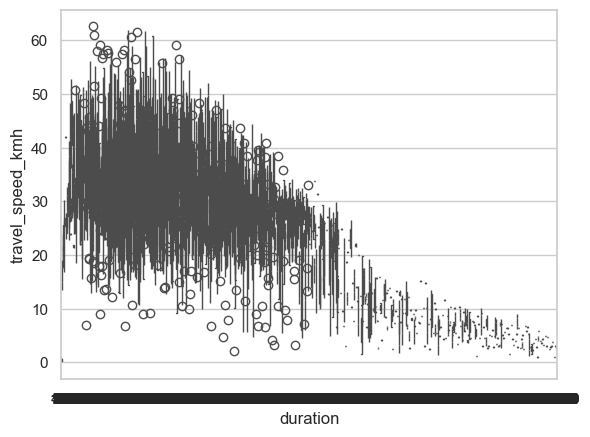

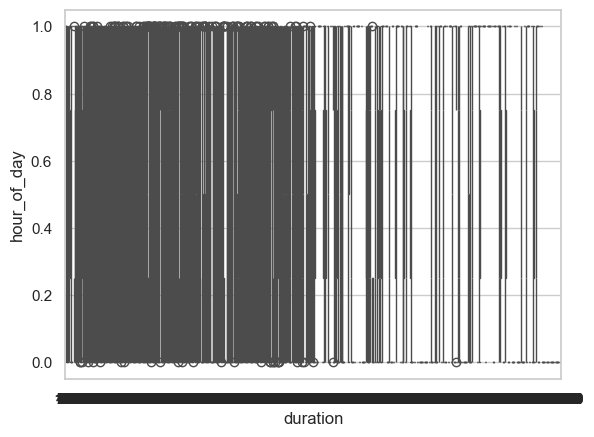

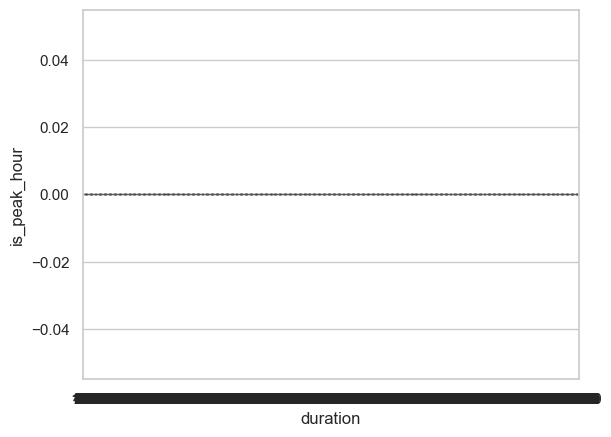

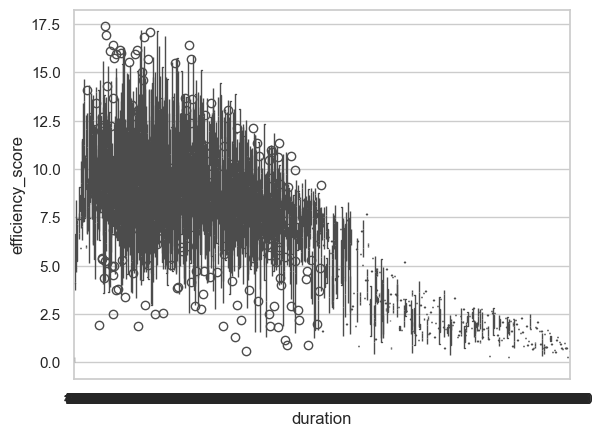

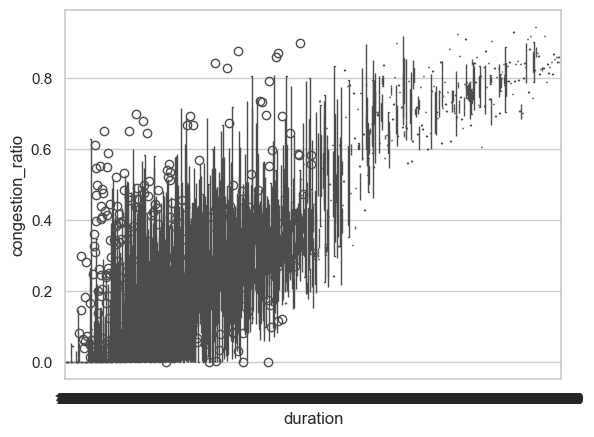

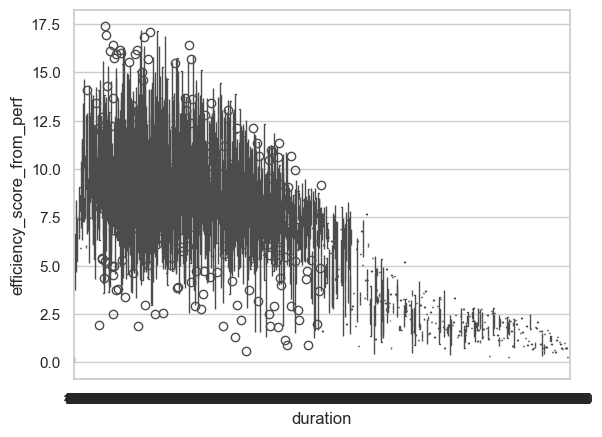

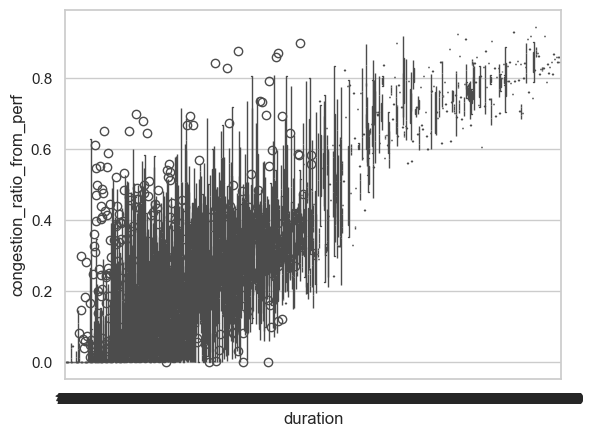

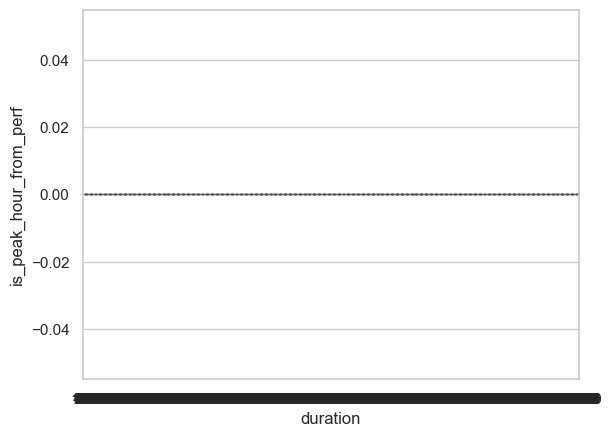

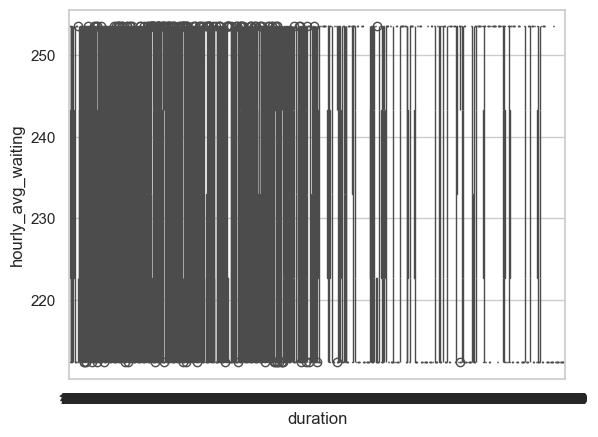

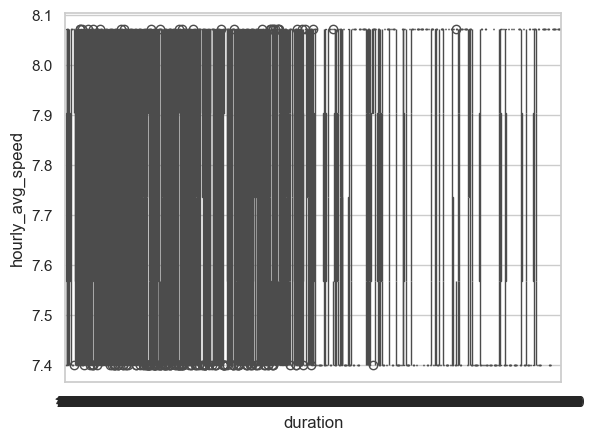

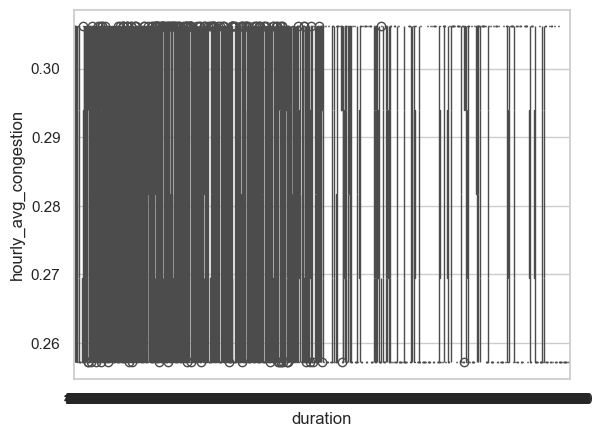

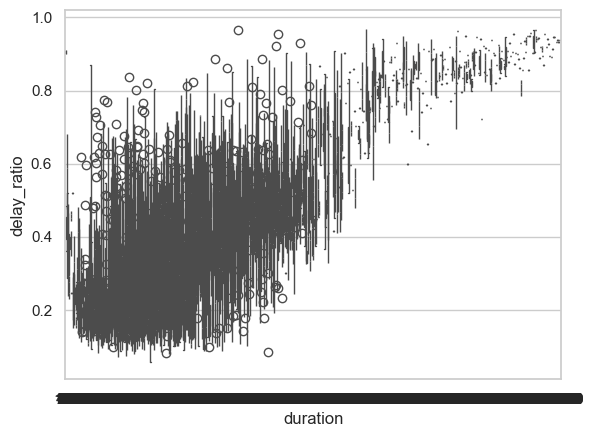

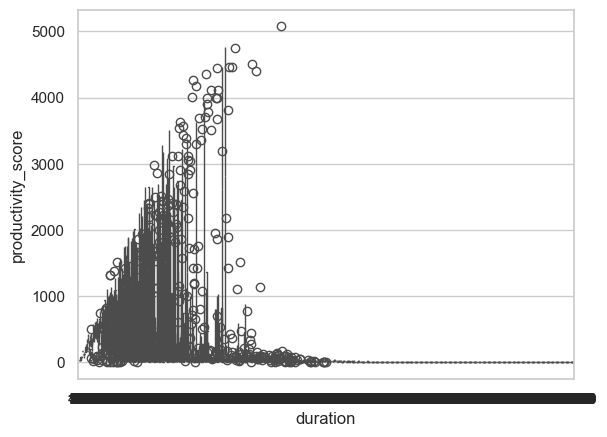

In [12]:
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(data=df, x="duration", y=col)
    plt.show()


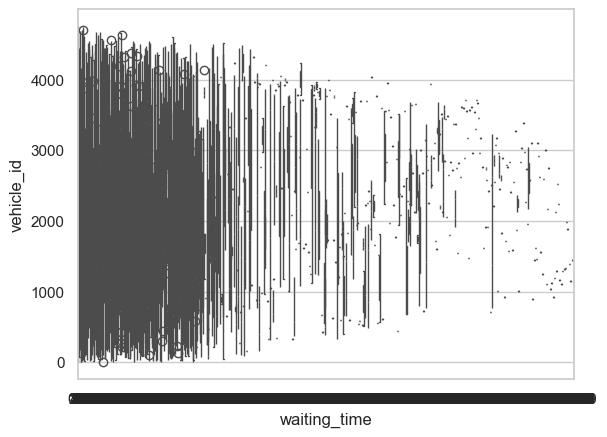

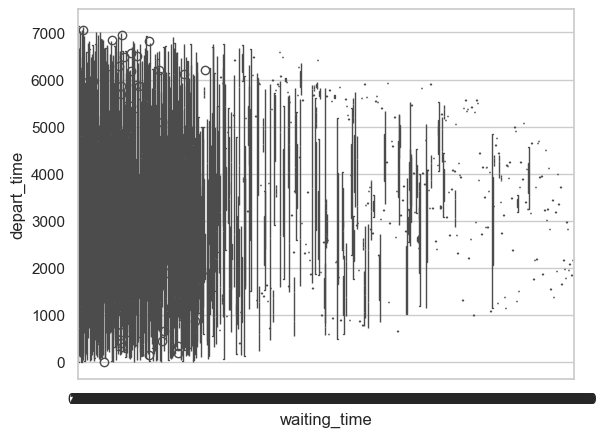

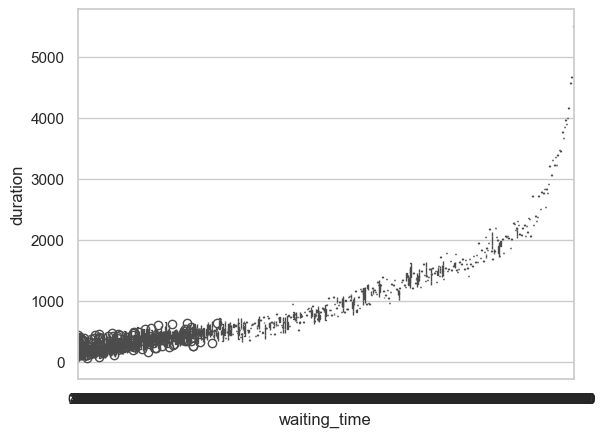

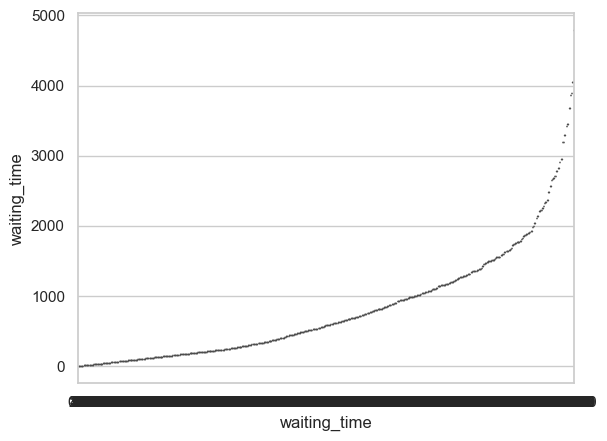

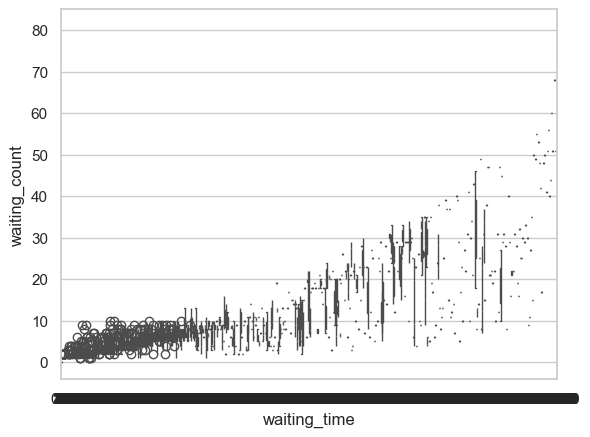

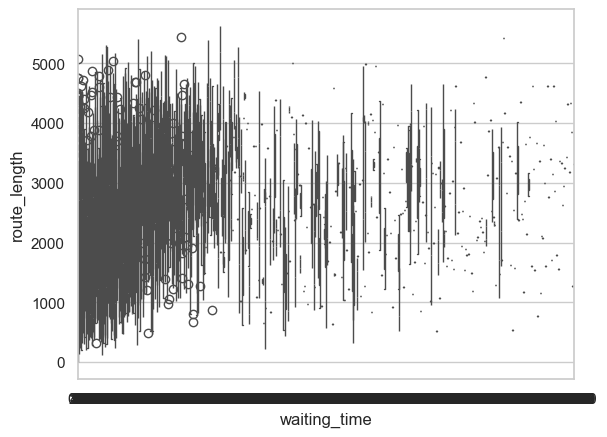

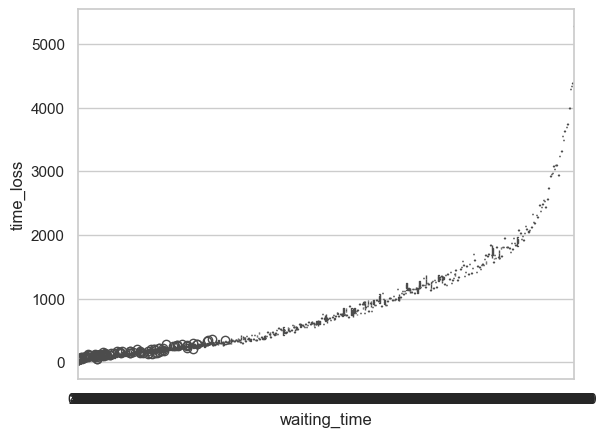

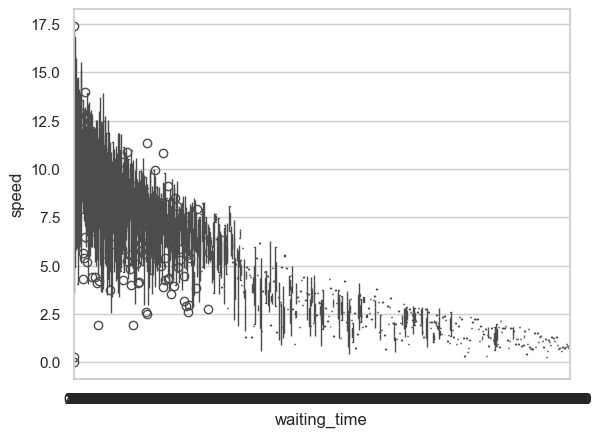

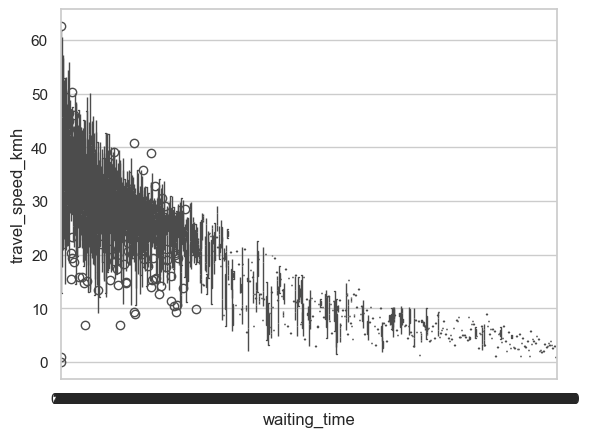

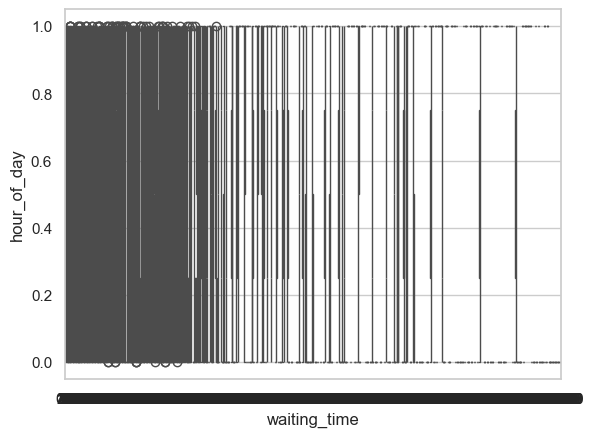

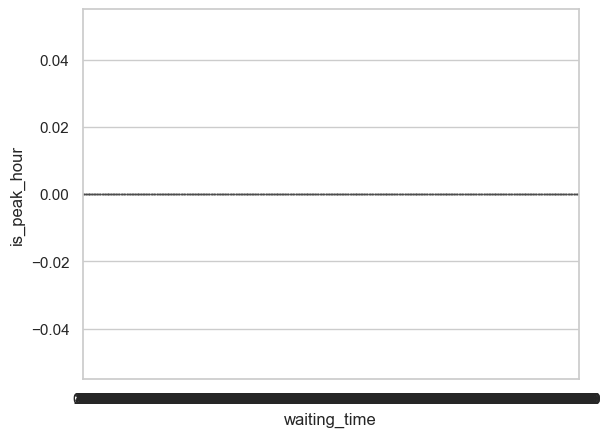

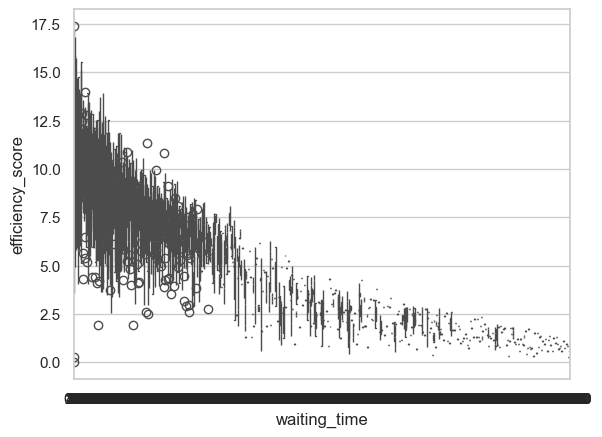

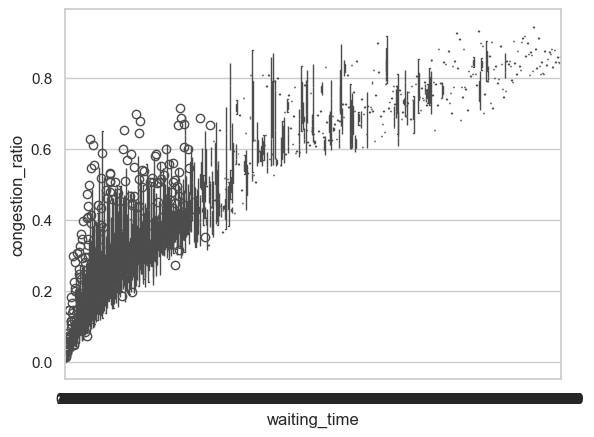

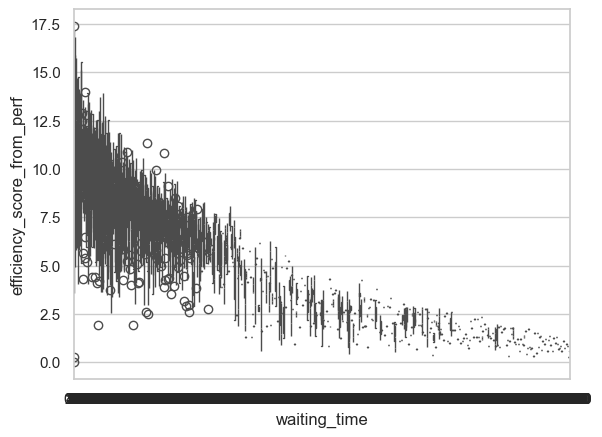

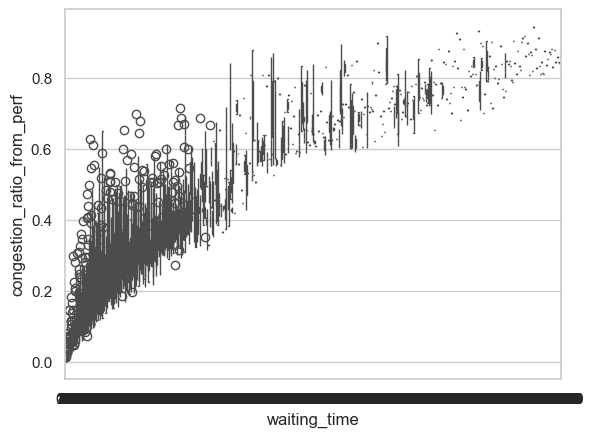

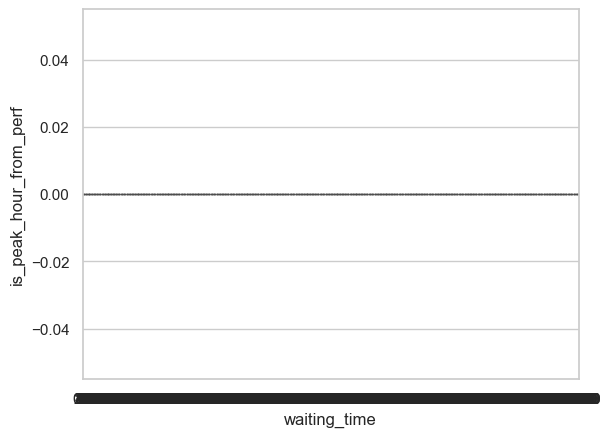

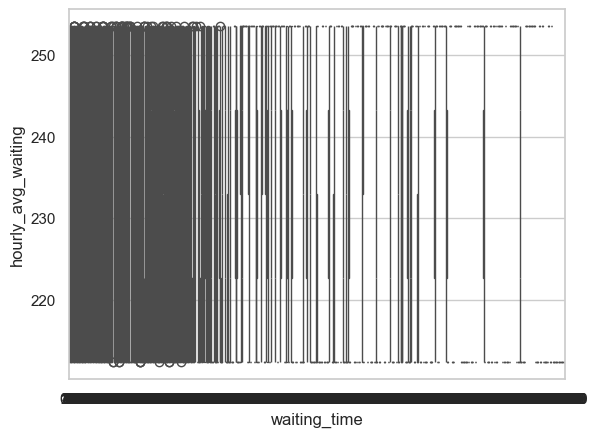

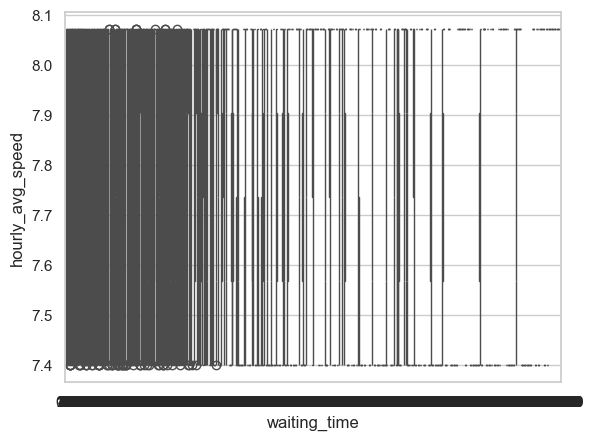

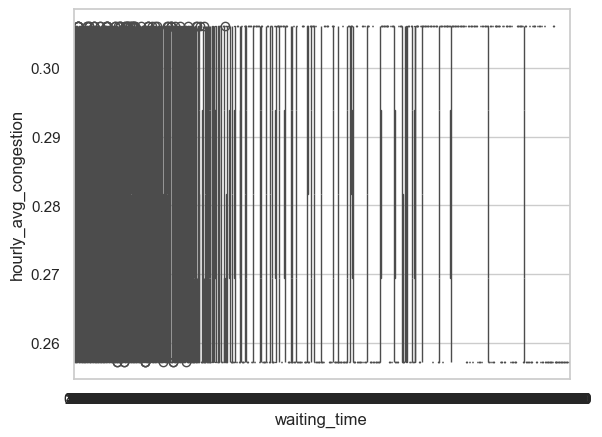

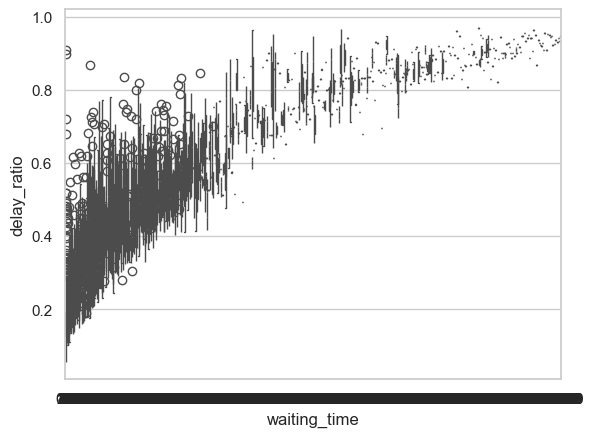

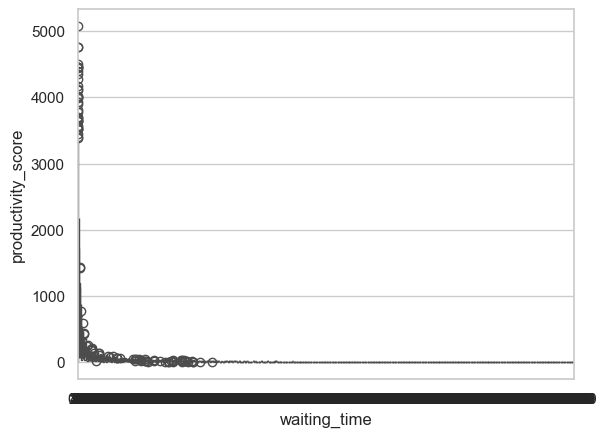

In [13]:
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(data=df, x="waiting_time", y=col)
    plt.show()


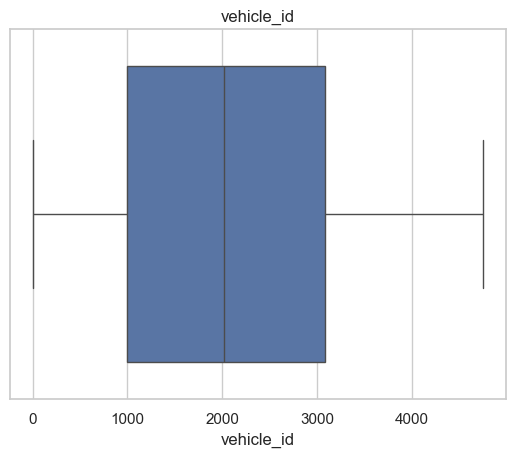

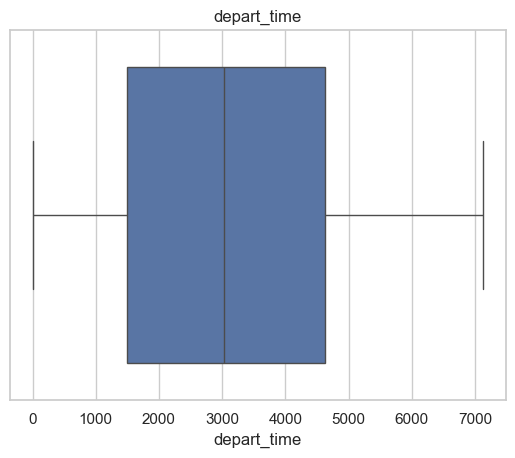

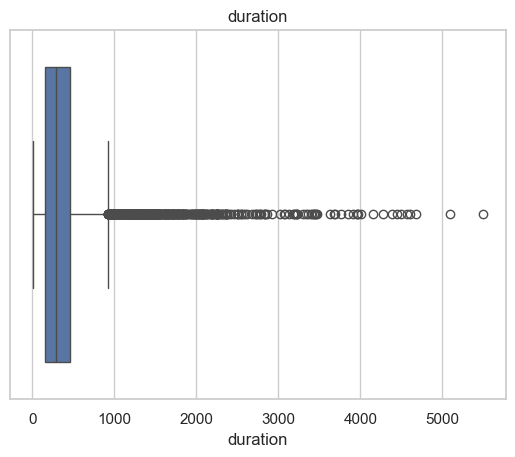

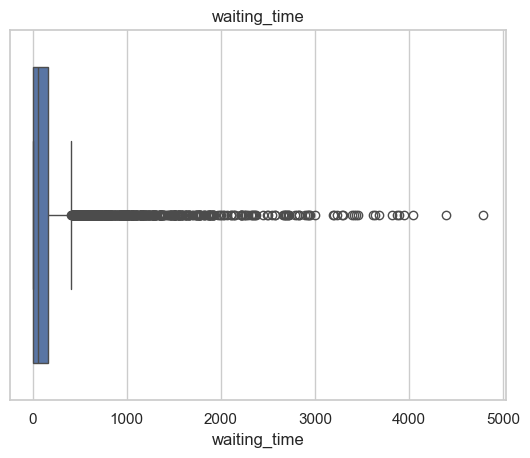

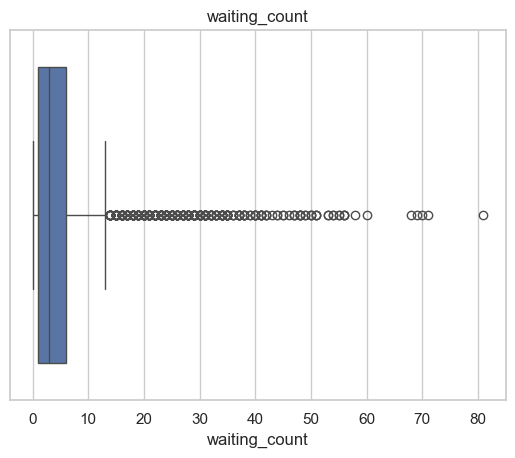

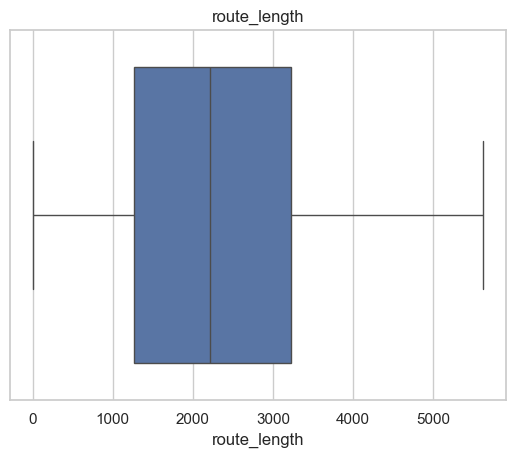

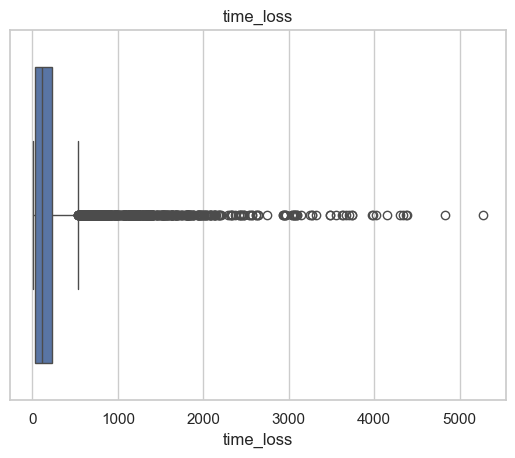

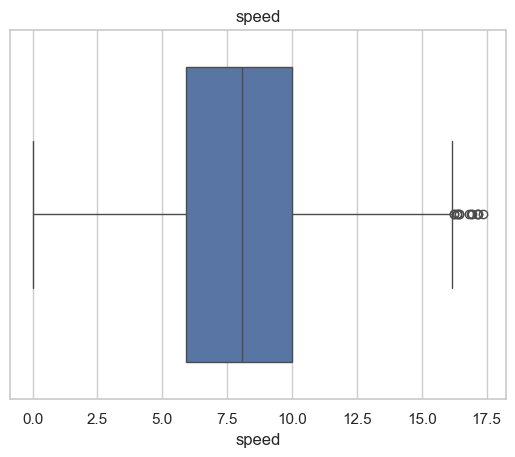

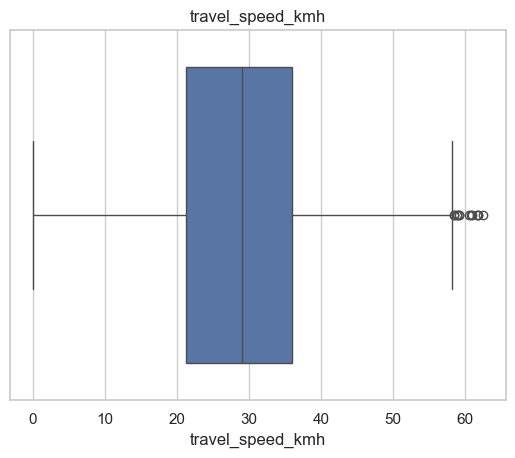

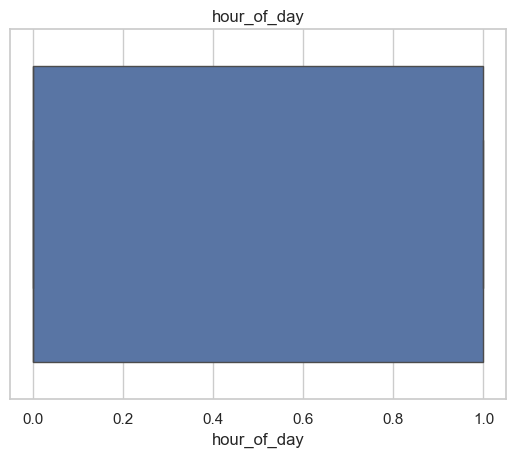

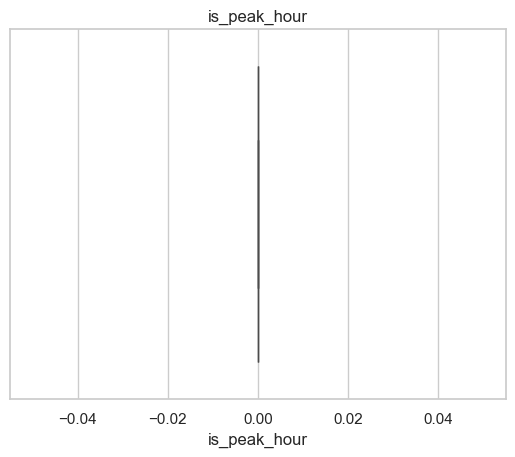

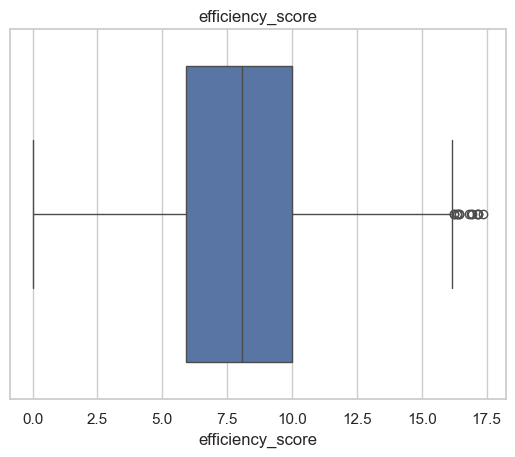

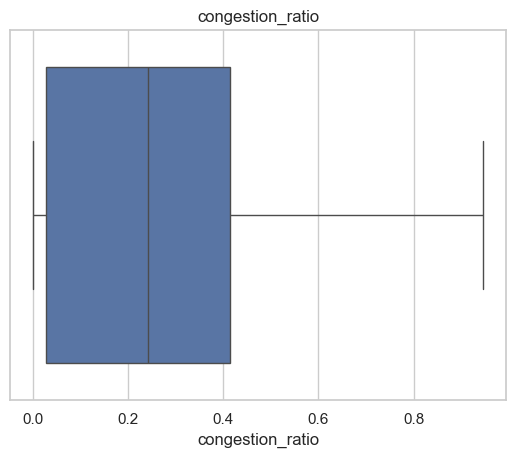

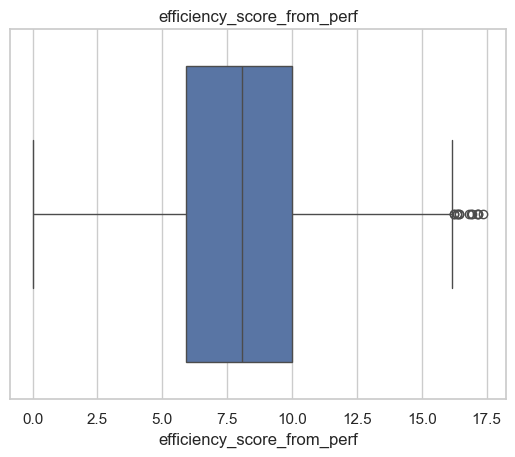

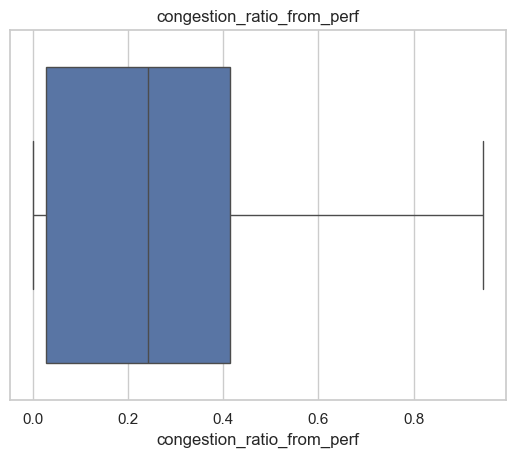

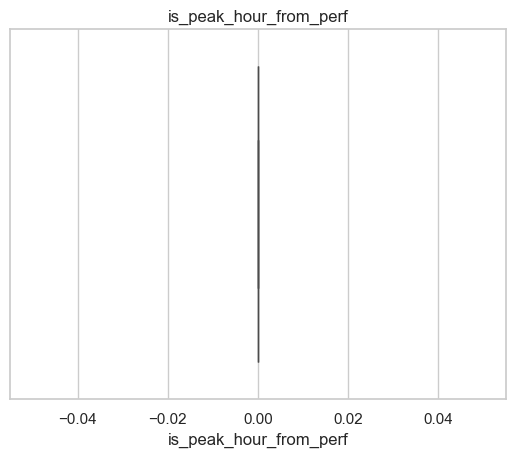

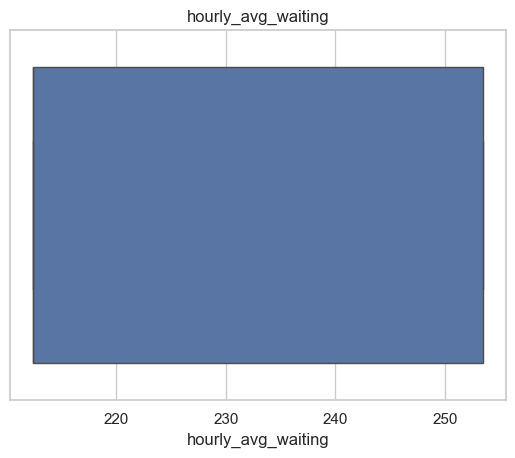

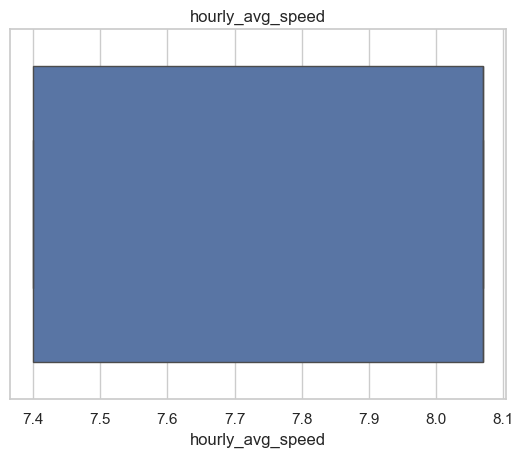

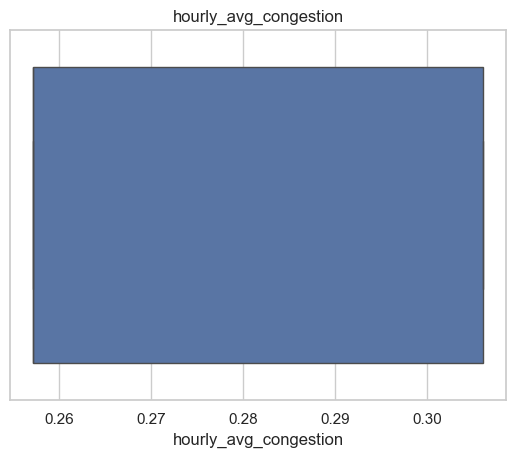

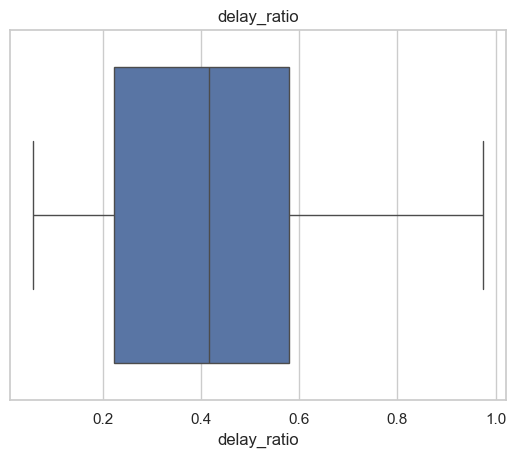

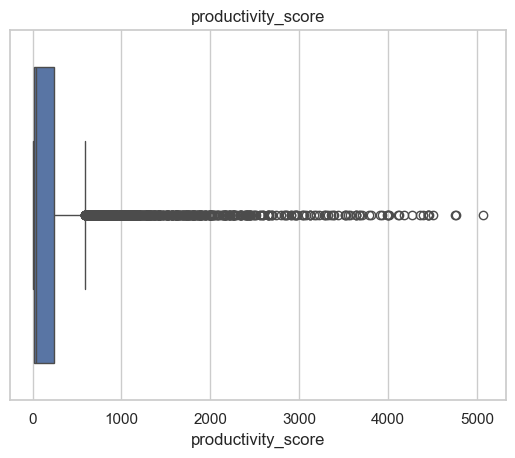

In [14]:
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


Observations:
1. Missing values - No missing values
2. Duplicate rows - 0
3. Numeric columns - 21
4. Categorical columns - 2
5. Outliers - duration, waiting_time, waiting_count, time_loss, speed, travel_speed_kmh, efficiency_score, efficiency_score_from_perf, productivity_score have outlier
6. High correlation - vehicle_id and depart_time, duration and waiting_time, speed and travel_speed_kmh, time_loss and duration, time_loss and waiting_time, efficiency_score and speed, efficiency_score and travel_speed_kmh, efficiency_score_from_perf and speed, efficiency_score_from_perf and travel_speed_kmh, efficiency_score_from_perf and efficiency_score, congestion_ratio_from_perf and congestion_ratio, hourly_avg_waiting and hour_of_day, hourly_avg_congestion and hour_of_day, delay_ratio and congestion_ratio, delay_ratio and congestion_ratio_from_perf,  hourly_avg_congestion and hourly_avg_waiting



In [17]:
for col in df.columns:
    print(col, df[col].unique()[:10])  # show first 10 unique values


vehicle_id [ 3 10  0 32 65 26 54 51 15 55]
depart_time [ 5. 15.  0. 48. 98. 39. 81. 77. 23. 83.]
duration [ 69.  60.  94.  62.  12. 104.  66.  71. 140.  87.]
waiting_time [ 0. 10.  5. 14. 19. 43. 35.  8. 44. 41.]
waiting_count [0 1 2 3 4 5 7 6 8 9]
route_length [ 637.42  414.6   789.03  478.15   84.57 1057.35  791.17 1106.5  1304.11
  519.26]
time_loss [15.78 23.78 25.83 28.45  3.51 21.09 14.83 13.86 36.77 17.84]
speed [ 9.23797101  6.91        8.39393617  7.71209677  7.0475     10.16682692
 11.98742424 15.58450704  9.31507143  5.96850575]
travel_speed_kmh [33.25669565 24.876      30.21817021 27.76354839 25.371      36.60057692
 43.15472727 56.10422535 33.53425714 21.48662069]
hour_of_day [0. 1.]
is_peak_hour [0]
efficiency_score [ 9.23797101  6.91        8.39393617  7.71209677  7.0475     10.16682692
 11.98742424 15.58450704  9.31507143  5.96850575]
congestion_ratio [0.         0.16666667 0.05319149 0.22580645 0.13571429 0.39090909
 0.20588235 0.05128205 0.30769231 0.17596567]
vehicle

In [18]:
df.nunique()


vehicle_id                    3988
depart_time                   3844
duration                      1094
waiting_time                   810
waiting_count                   63
route_length                  3969
time_loss                     3766
speed                         3988
travel_speed_kmh              3988
hour_of_day                      2
is_peak_hour                     1
efficiency_score              3988
congestion_ratio              2943
vehicle_type                     1
efficiency_score_from_perf    3988
congestion_ratio_from_perf    2943
is_peak_hour_from_perf           1
hourly_avg_waiting               2
hourly_avg_speed                 2
hourly_avg_congestion            2
delay_ratio                   3979
productivity_score            3987
efficiency_category              3
dtype: int64